In [9]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
model = nn.Linear(input_size, output_size)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
for epoch in range(num_epochs):
  inputs = torch.from_numpy(x_train)
  targets = torch.from_numpy(y_train)

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 5 == 0:
    print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [5/60], Loss: 7.4146
Epoch [10/60], Loss: 3.1062
Epoch [15/60], Loss: 1.3608
Epoch [20/60], Loss: 0.6537
Epoch [25/60], Loss: 0.3672
Epoch [30/60], Loss: 0.2512
Epoch [35/60], Loss: 0.2042
Epoch [40/60], Loss: 0.1851
Epoch [45/60], Loss: 0.1774
Epoch [50/60], Loss: 0.1742
Epoch [55/60], Loss: 0.1730
Epoch [60/60], Loss: 0.1724


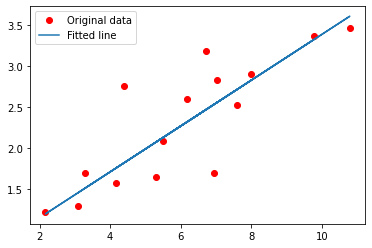

In [10]:
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

torch.save(model.state_dict(), 'model.ckpt')

In [11]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [12]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

In [13]:
y = w * x + b

In [14]:
y.backward()

In [15]:
print(x.grad)
print(w.grad)
print(b.grad)

tensor(2.)
tensor(1.)
tensor(1.)


In [16]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

linear = nn.Linear(3, 2)
print('w: ', linear.weight)
print('b: ', linear.bias)

w:  Parameter containing:
tensor([[ 0.2394, -0.2033,  0.4321],
        [ 0.0734, -0.2731,  0.4894]], requires_grad=True)
b:  Parameter containing:
tensor([0.5014, 0.5477], requires_grad=True)


In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [18]:
pred = linear(x)
loss = criterion(pred, y)
print('loss : ', loss.item())

loss.backward()

print('dL/dw: ', linear.weight.grad)
print('dL/db: ', linear.bias.grad)


loss :  1.6246776580810547
dL/dw:  tensor([[ 0.2233,  0.0298,  1.1551],
        [-0.1631, -0.2247,  0.9628]])
dL/db:  tensor([0.6532, 0.8240])


In [19]:
linear.weight.grad.shape

torch.Size([2, 3])

In [20]:
y.shape

torch.Size([10, 2])

In [21]:
optimizer.step()

pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization : ', loss.item())

loss after 1 step optimization :  1.5899943113327026


In [22]:
x = np.array([[1, 2], [3, 4]])
y = torch.from_numpy(x)
z = y.numpy()

In [23]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True, 
                                             transform=transforms.ToTensor(),
                                             download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../../data/cifar-10-python.tar.gz to ../../data/


In [24]:
image, label = train_dataset[0]
print(image.size())
print(label)

torch.Size([3, 32, 32])
6


In [25]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

data_iter = iter(train_loader)

images, labels = data_iter.next()

In [26]:
for images, labels in train_loader:
  pass

In [29]:
class CustomDataset(torch.utils.data.Dataset):
  def __init__(self):
    pass
  def __getitem__(self, index):
    pass
  def __len__(self):
    return 1

In [30]:
custom_dataset = CustomDataset()
train_loader = torch.utils.data.DataLoader(dataset=custom_dataset, batch_size=64, shuffle=True)

In [31]:
resnet = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [32]:
for param in resnet.parameters():
  param.requires_grad = False

resnet.fc = nn.Linear(resnet.fc.in_features, 100)

In [33]:
images = torch.randn(64, 3, 224, 224)
outputs = resnet(images)
print(outputs.size())

torch.Size([64, 100])


In [34]:
torch.save(resnet, 'model.ckpt')
model = torch.load('model.ckpt')

torch.save(resnet.state_dict(), 'params.ckpt')
resnet.load_state_dict(torch.load('params.ckpt'))

<All keys matched successfully>